# 1. Imports packages

In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from library.sb_utils import save_file

In [2]:
sns.set()

# 2. Load Data

In [362]:
df = pd.read_csv("bank.csv")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [5]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


*Bank client data:*
1. age: (numeric)
2. job: type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-emplo yed','services','student','technician','unemployed','unknown')
3. marital: marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. education: (categorical: primary, secondary, tertiary and unknown)
5. default: has credit in default? (categorical: 'no','yes','unknown')
6. housing: has housing loan? (categorical: 'no','yes','unknown')
7. loan: has personal loan? (categorical: 'no','yes','unknown')
8. balance: Balance of the individual.

*Related with the last contact of the current campaign:*

9. contact: contact communication type (categorical: 'cellular','telephone')
10. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
11. day: last contact day of the month (numeric: 1-31)
12. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

*Other attributes:*

13. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
14. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; -1 means client was not previously
contacted)
15. previous: number of contacts performed before this campaign and for this client (numeric)
16. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

**Output variable (desired target):**

17. y - has the client subscribed a term deposit? (binary: 'yes','no')

# 3. EDA

## 3.1 Exam our target variable: deposit

<AxesSubplot:xlabel='deposit', ylabel='count'>

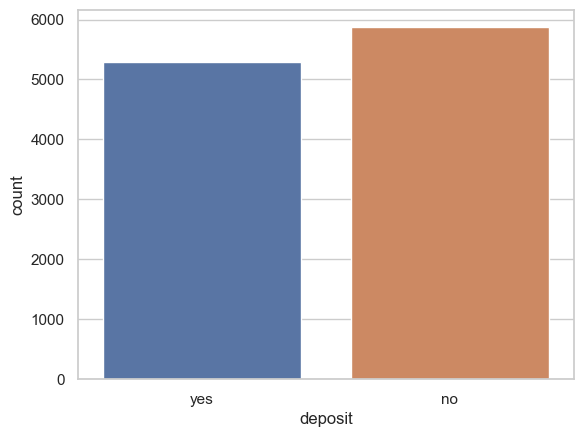

In [70]:
sns.countplot(x= 'deposit', data=df)


On the diagram we see that counts for 'yes' and 'no' values for 'deposit' are close, so we can use accuracy as a metric for a model, which predicts the campaign outcome.

## 3.2 Exam Client's Demographic:

- age: (numeric)
- job: type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-emplo yed','services','student','technician','unemployed','unknown')
- marital: marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
- education: (categorical: primary, secondary, tertiary and unknown)
- default: has credit in default? (categorical: 'no','yes','unknown')
- housing: has housing loan? (categorical: 'no','yes','unknown')
- loan: has personal loan? (categorical: 'no','yes','unknown')
- balance: Balance of the individual.

In [122]:
df_demographic = df[['age','job','marital','education','default','housing','loan','balance']]

In [123]:
df_demographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   housing    11162 non-null  object
 6   loan       11162 non-null  object
 7   balance    11162 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 697.8+ KB


In [133]:
df_demographic.duplicated().sum()

846

In [134]:
df_demographic = df_demographic.drop_duplicates()

In [135]:
df_demographic.duplicated().sum()

0

### Client Demographic Distribution with Percentage Labels

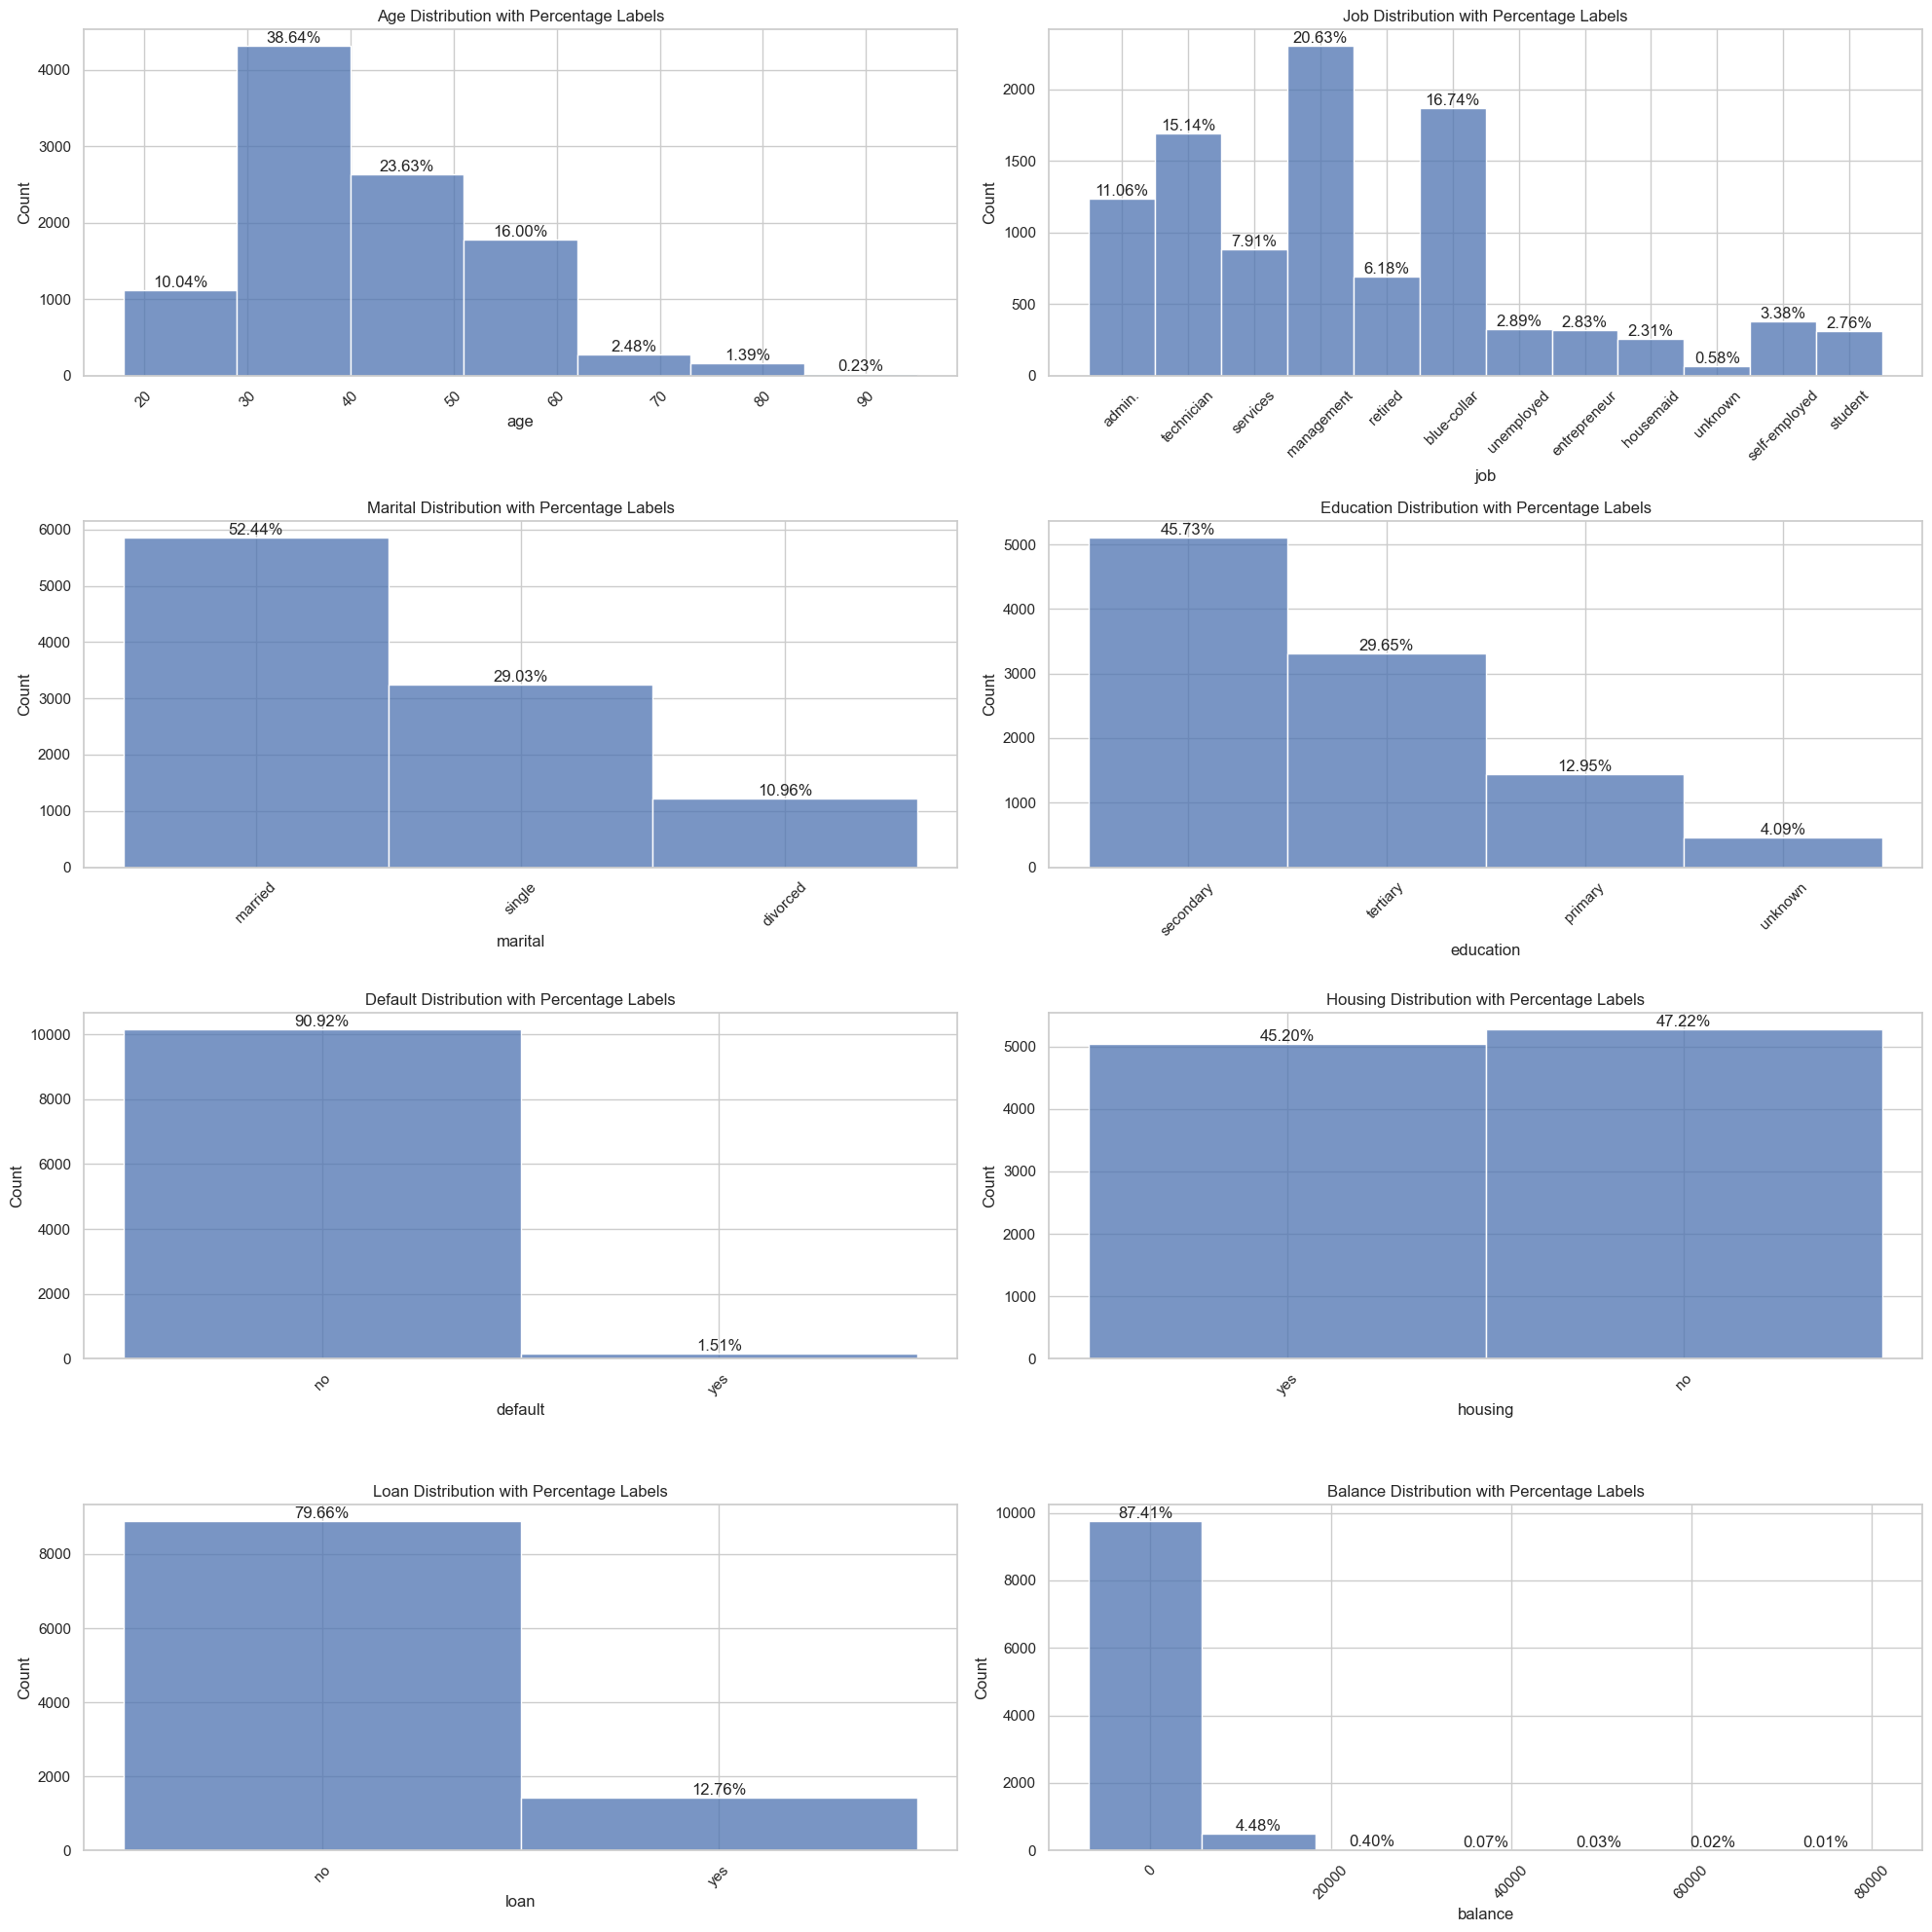

In [187]:
# List of columns to plot
columns_to_plot = df_demographic.columns.tolist()

# Define the number of rows and columns for the grid
n_rows = 4
n_cols = 2

# Create the subplots grid
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 20))
axes = axes.flatten()

# Create a histogram plot with percentage labels for each column
for idx, column in enumerate(columns_to_plot):
    ax = axes[idx]
    sns.histplot(x=column, data=df_demographic, bins=7, ax=ax)

    # Calculate the total count of data points in the current column
    total = len(df[column])

    # Add percentage labels above the bars
    for p in ax.patches:
        height = p.get_height()
        ax.annotate('{:.2f}%'.format(100 * height / total),
                    (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=12)

    # Set the title and rotate x-axis labels
    ax.set_title(f"{column.capitalize()} Distribution with Percentage Labels")
    ax.tick_params(axis='x', rotation=45)

# Remove unused subplots
for ax in axes[len(columns_to_plot):]:
    ax.axis('off')

# Adjust layout and show the grid of plots
plt.tight_layout()
plt.show()

- 36% of clients are in the age 30's-40's 
- Top 3 job: 20% of clients work in mamangement, followed by 16% in blue-collar, and 15% technician.
- More than half with 52% are married
- 45% have a secondary education
- Mostly have no loan and no default credit card. 
- Halh half in terms of housing
- 90% have balance below $20,000

### Demographic Distribution vs Target variable with Percentage Labels

In [210]:
df_demographic_deposit = df[['age','job','marital','education','default','housing','loan','balance','deposit']]

In [214]:
df_demographic_deposit = df_demographic_deposit.drop_duplicates()

In [216]:
df_demographic_deposit.duplicated().sum()

0

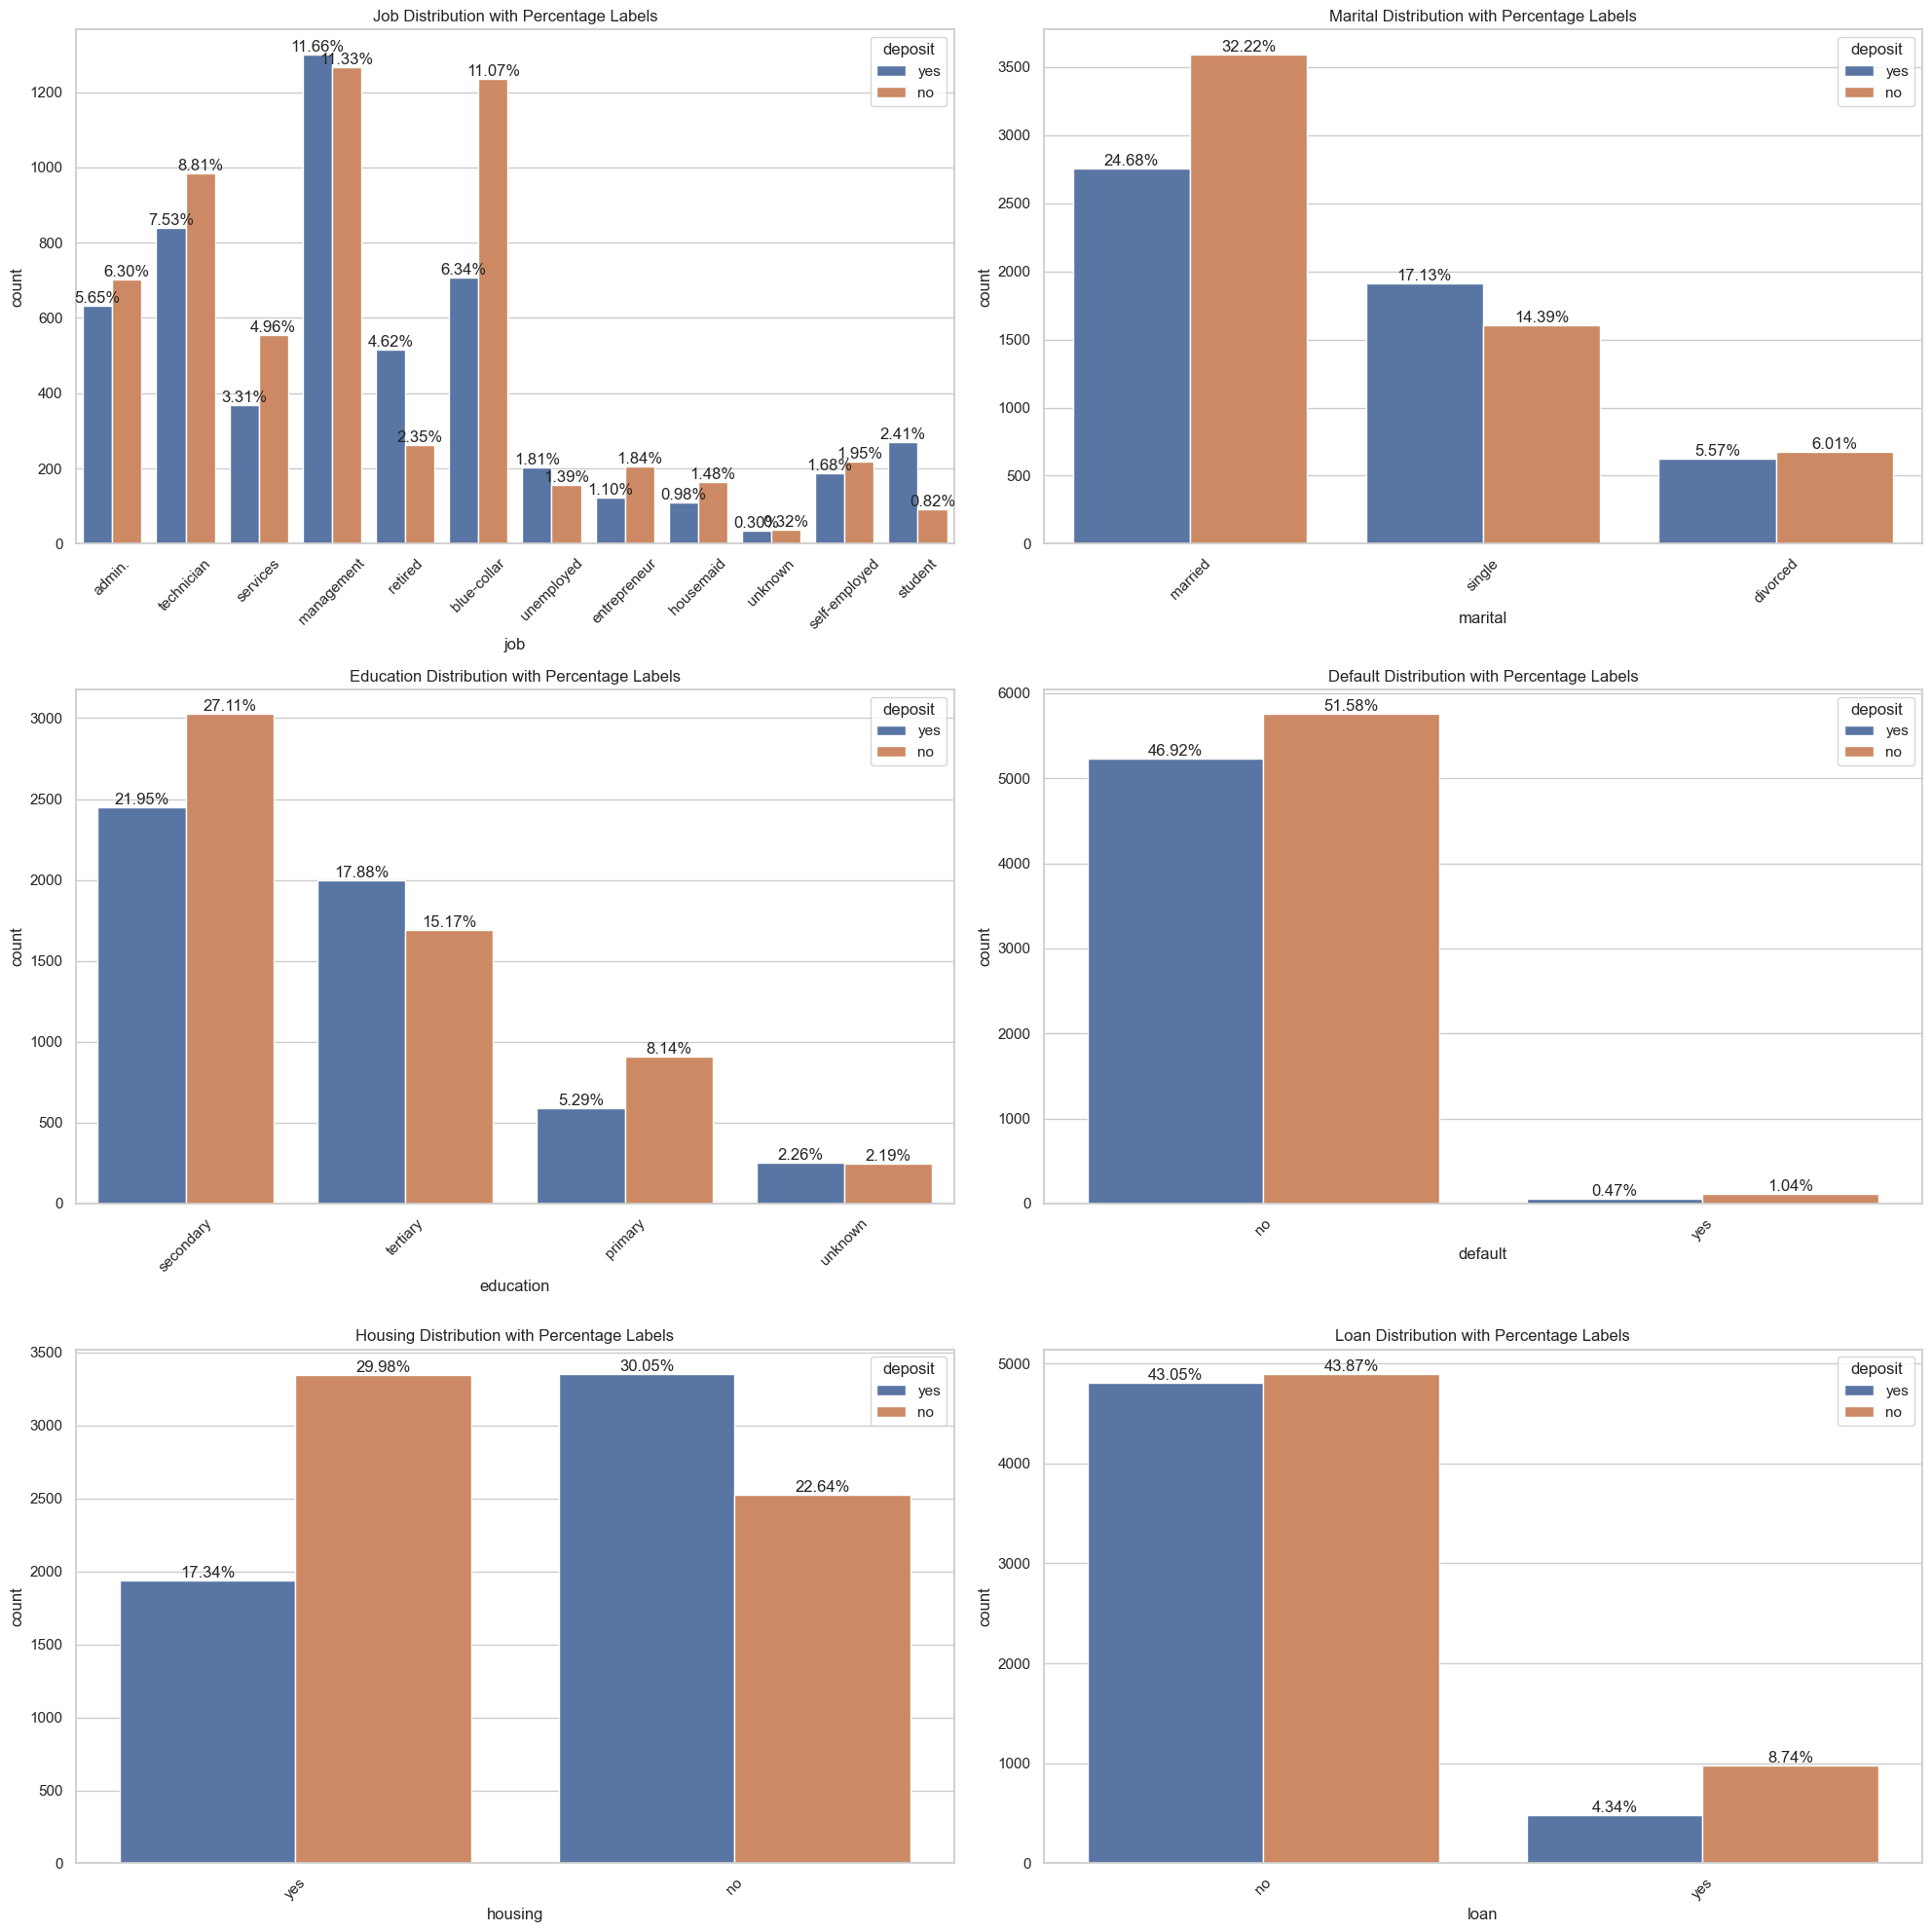

In [245]:
columns_to_plot = ['job', 'marital', 'education', 'default', 'housing', 'loan']

# Define the number of rows and columns for the grid
n_rows = 3
n_cols = 2

# Create the subplots grid
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 20))
axes = axes.flatten()

# Create a count plot with percentage labels for each column
for idx, column in enumerate(columns_to_plot):
    ax = axes[idx]
    sns.countplot(x=column, data=df_demographic_deposit, ax=ax, hue='deposit')

    # Calculate the total count of data points in the current column
    total = len(df[column])

    # Add percentage labels above the bars
    for p in ax.patches:
        height = p.get_height()
        ax.annotate('{:.2f}%'.format(100 * height / total),
                    (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=12)

    # Set the title and rotate x-axis labels
    ax.set_title(f"{column.capitalize()} Distribution with Percentage Labels")
    ax.tick_params(axis='x', rotation=45)

# Remove unused subplots
for ax in axes[len(columns_to_plot):]:
    ax.axis('off')

# Adjust layout and show the grid of plots
plt.tight_layout()
plt.show()

In terms of comparing with deposit, client's demographic aligns our previous discovery except that the clients who have a technician job have slightly higher deposit rate than blue-collar. 

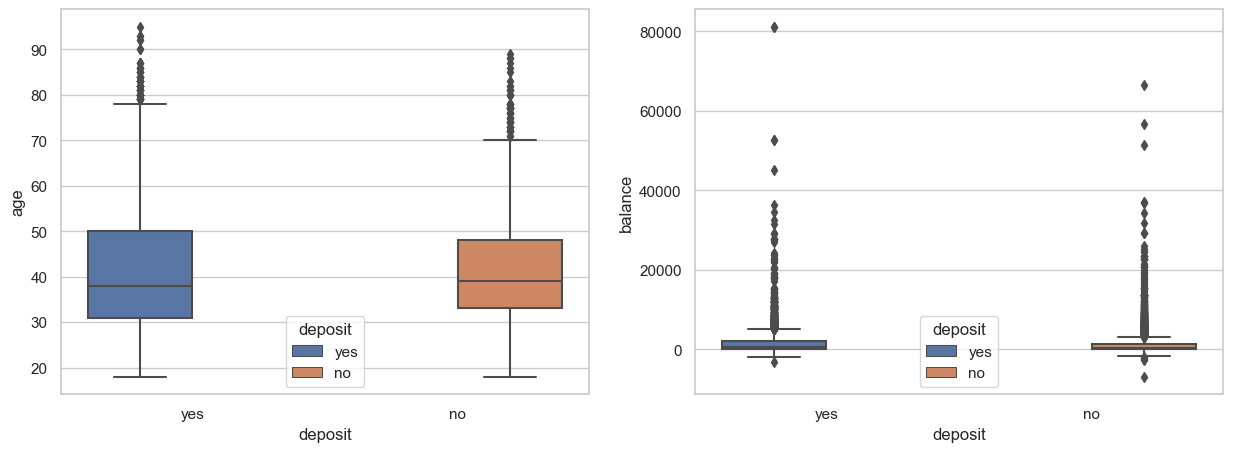

In [303]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5), squeeze=False)
axs = axs.flatten()

sns.boxplot(x='deposit', y='age', hue='deposit', data=df_demographic_deposit, ax=axs[0])
sns.boxplot(x='deposit', y='balance', hue='deposit', data=df_demographic_deposit, ax=axs[1])

plt.show()

Age and balance does not show any significince difference for deposit

## 3.3 Exam Campaign Data:

Related with the last contact of the current campaign:
- contact: contact communication type (categorical: 'cellular','telephone')
- month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
- day: last contact day of the month (numeric: 1-31)
- duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

Other attributes:
- campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; -1 means client was not previously contacted)
- previous: number of contacts performed before this campaign and for this client (numeric)
- poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')


In [261]:
df_campaign= df[['contact','month','day','duration','campaign','pdays','previous','poutcome']]

In [263]:
df_campaign.duplicated().sum()

110

In [267]:
df_campaign=df_campaign.drop_duplicates()

In [268]:
df_campaign.duplicated().sum()

0

In [262]:
df_campaign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   contact   11162 non-null  object
 1   month     11162 non-null  object
 2   day       11162 non-null  int64 
 3   duration  11162 non-null  int64 
 4   campaign  11162 non-null  int64 
 5   pdays     11162 non-null  int64 
 6   previous  11162 non-null  int64 
 7   poutcome  11162 non-null  object
dtypes: int64(5), object(3)
memory usage: 697.8+ KB


### Campaign Numeric Feature vs Target Variable

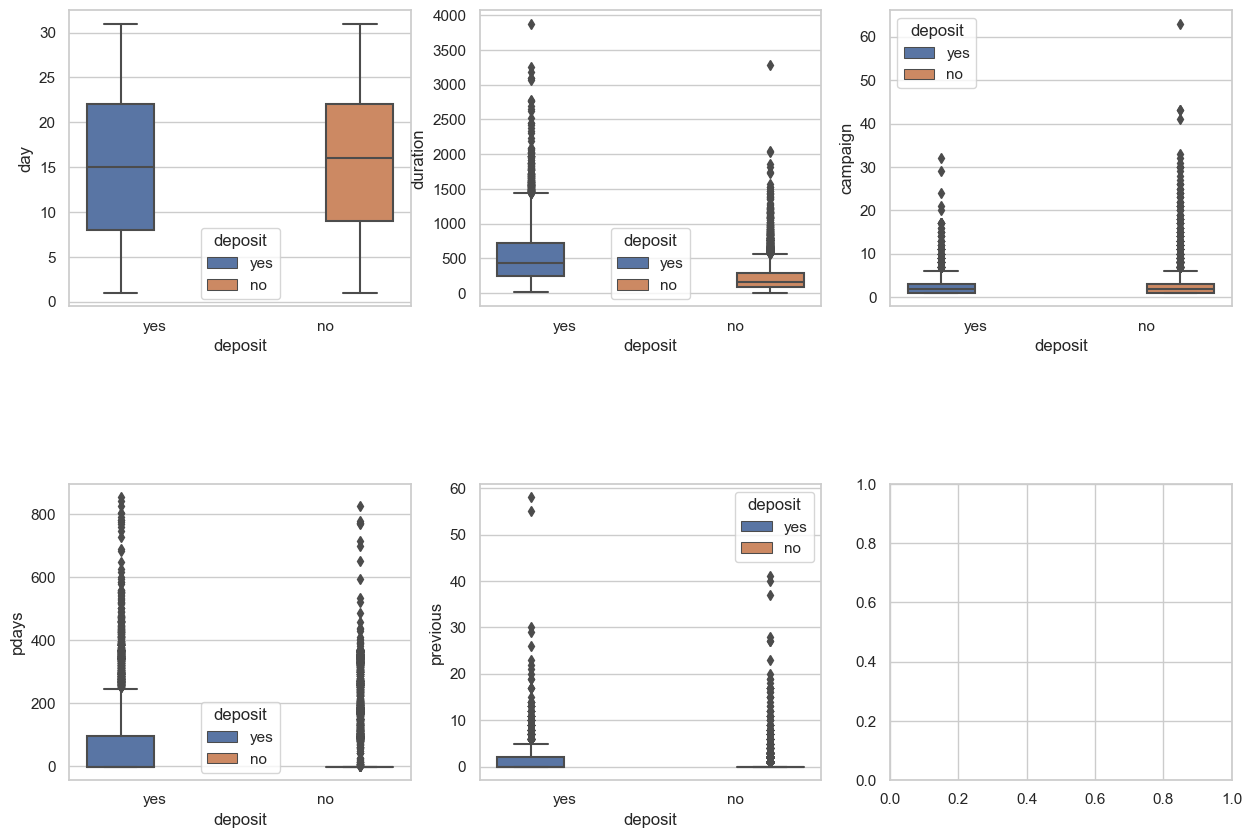

In [281]:
ncols = 3
nrows = int(np.ceil(len(df_campaign.select_dtypes(exclude='object').columns) / ncols))
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows), squeeze=False)
axs = axs.flatten()

for i, col in enumerate(df_campaign.select_dtypes(exclude='object').columns):
    if i < len(axs):
        sns.boxplot(x='deposit', y=df_campaign[col], hue='deposit', data=df, ax=axs[i])

fig.subplots_adjust(hspace=0.6)
plt.show()

We can see that some numerical features have outliers (especially 'pdays', 'campaign' and 'previous' columns). 

Possibly there are incorrect values (noisy data), so we should look closer at the data and decide how do we manage the noise. 

Let's look closer at the values of 'campaign', 'pdays' and 'previous' columns:

In [283]:
df[['pdays', 'campaign', 'previous']].describe()

,pdays,campaign,previous
count,11162.000000,11162.000000,11162.000000
mean,51.330407,2.508421,0.832557
std,108.758282,2.722077,2.292007
min,-1.000000,1.000000,0.000000
25%,-1.000000,1.000000,0.000000
50%,-1.000000,2.000000,0.000000
75%,20.750000,3.000000,1.000000
max,854.000000,63.000000,58.000000


Percentage of 'pdays' values above 400:

In [286]:
len (df[df['pdays'] > 400] ) / len(df) * 100

1.2005017022039062

'pdays' holds the number of days that passed by after the client was last contacted from a previous campaign 

Looking closer into 'pdays' data we can see that:

- only 1.2% of values above 400. They are possibly outliers, so we should consider imputing something (possibly mean value) instead of these values.
- 50% of vlues -1 meaning never been contacted, so we can also consider imput it to 0

In [284]:
# Percentage of 'campaign' values above 20:
len (df[df['campaign'] > 34] ) / len(df) * 100

0.035835871707579285

'campaign' holds the number of contacts performed during this campaign and for this client (numeric, includes last contact) Numbers for 'campaign' above 34 are clearly noise, so I suggest to impute them with average campaign values for pre processing.

In [285]:
# Percentage of 'previous' values above 20:
len (df[df['previous'] > 34] ) / len(df) * 100

0.04479483963447411

'previous' holds the number of contacts performed before this campaign and for this client (numeric). Numbers for 'previous' above 34 are also really strange, so I suggest to impute them with average campaign values for pre processing.

### Campaign Distribution vs Target variable with Percentage Labels

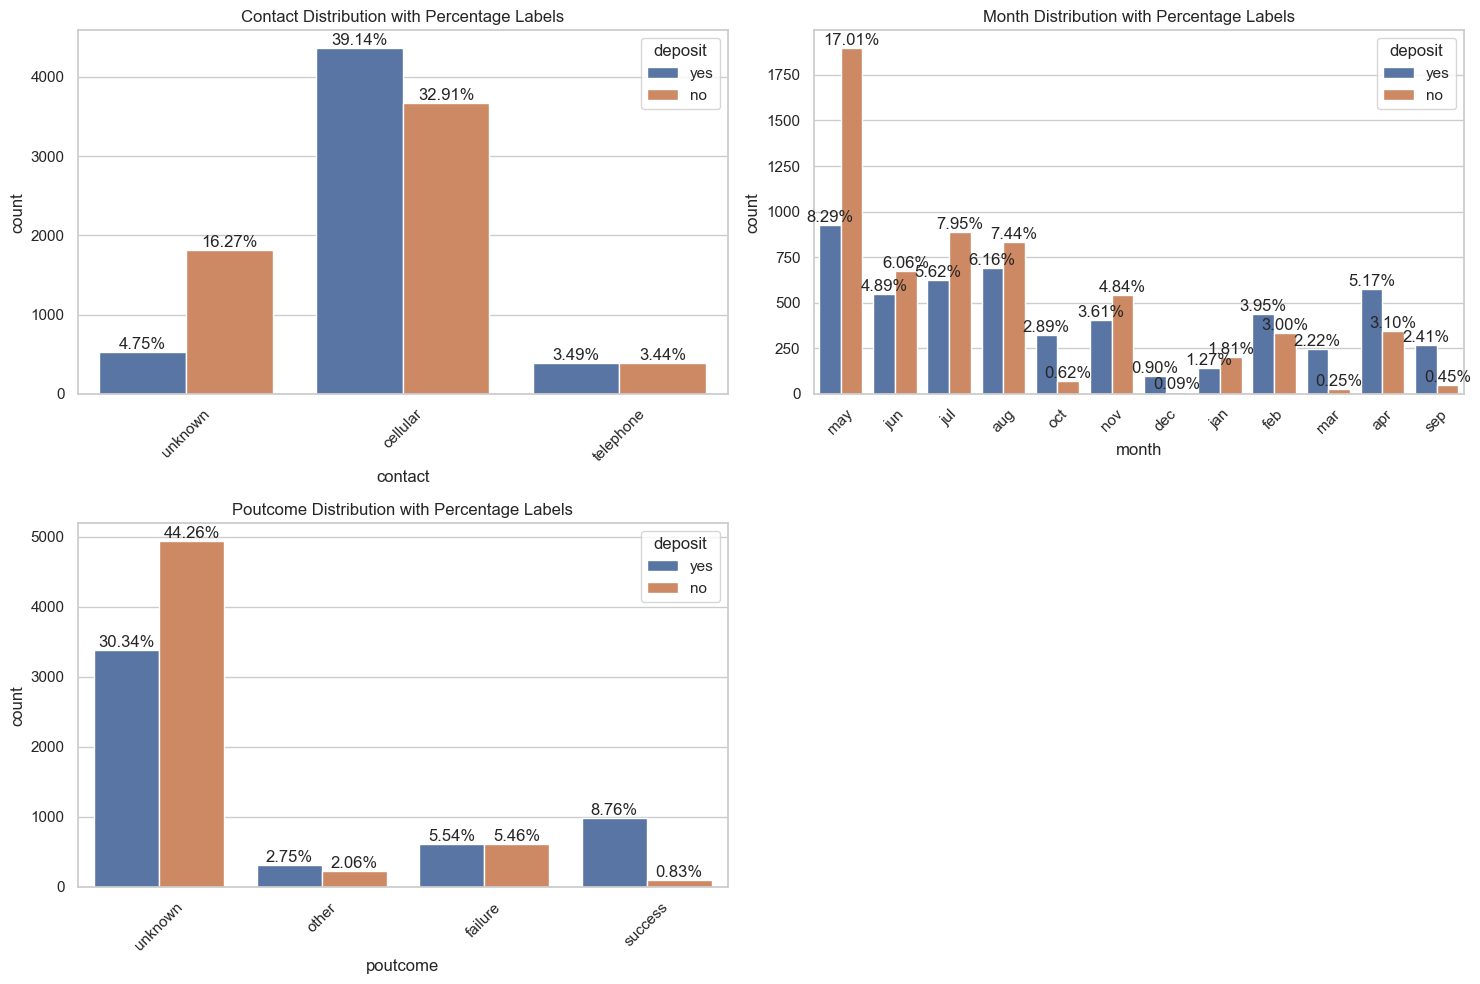

In [317]:
columns_to_plot = ['contact', 'month', 'poutcome']

# Define the number of rows and columns for the grid
n_rows = 2
n_cols = 2

# Create the subplots grid
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
axes = axes.flatten()

# Create a count plot with percentage labels for each column
for idx, column in enumerate(columns_to_plot):
    ax = axes[idx]
    sns.countplot(x=column, data=df, ax=ax, hue='deposit')

    # Calculate the total count of data points in the current column
    total = len(df[column])

    # Add percentage labels above the bars
    for p in ax.patches:
        height = p.get_height()
        ax.annotate('{:.2f}%'.format(100 * height / total),
                    (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=12)

    # Set the title and rotate x-axis labels
    ax.set_title(f"{column.capitalize()} Distribution with Percentage Labels")
    ax.tick_params(axis='x', rotation=45)

# Remove unused subplots
for ax in axes[len(columns_to_plot):]:
    ax.axis('off')

# Adjust layout and show the grid of plots
plt.tight_layout()
plt.show()

- Conctact by celler have 39% deposit rate
- May & August have higher deposit rate
- Unknown outcome of the previous marketing campaign has higher depost rate